# 第4章: 形態素解析
夏目漱石の小説『吾輩は猫である』の文章（neko.txt）をMeCabを使って形態素解析し，その結果をneko.txt.mecabというファイルに保存せよ．このファイルを用いて，以下の問に対応するプログラムを実装せよ．

なお，問題37, 38, 39はmatplotlibもしくはGnuplotを用いるとよい．

In [5]:
import subprocess

def system(command, **options):
    proc = subprocess.Popen(command, shell=True,
                            stdout=subprocess.PIPE,
                            **options)
    return proc.communicate()[0].decode('utf-8')

def cat(filepath):
    return system(f'cat {filepath}')

In [6]:
system('''
mkdir -p data
cd data
if [ ! -f neko.txt ]
then curl -o neko.txt http://www.cl.ecei.tohoku.ac.jp/nlp100/data/neko.txt
fi

if [ ! -x /usr/local/bin/mecab ]; then brew install mecab mecab-ipadic; fi

if [ ! -f neko.txt.mecab ]; then mecab neko.txt > neko.txt.mecab; fi
''')

''

In [79]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

---
## 30. 形態素解析結果の読み込み
形態素解析結果（neko.txt.mecab）を読み込むプログラムを実装せよ．ただし，各形態素は表層形（surface），基本形（base），品詞（pos），品詞細分類1（pos1）をキーとするマッピング型に格納し，1文を形態素（マッピング型）のリストとして表現せよ．第4章の残りの問題では，ここで作ったプログラムを活用せよ．

In [36]:
import re
pattern = re.compile(r"(?P<surface>.+?)\t(?P<pos>[^,]+),(?P<pos1>[^,]+),([^,]*,){4}(?P<base>[^,]+).*")
def mcload(filename):
    sentence = []
    with open(filename, "r") as file:
        for word in file:
            words = pattern.match(word)
            if words:
                sentence.append({"surface":words.group("surface"), "base":words.group("base"), "pos":words.group("pos"), "pos1":words.group("pos1"), })
                if words.group("surface") == "。":
                    yield sentence
                    sentence = []

In [39]:
for line in mcload("neko.txt.mecab"):
    print(line)

[{'surface': '一', 'base': '一', 'pos': '名詞', 'pos1': '数'}, {'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': '吾輩', 'base': '吾輩', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': '猫', 'base': '猫', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'で', 'base': 'だ', 'pos': '助動詞', 'pos1': '*'}, {'surface': 'ある', 'base': 'ある', 'pos': '助動詞', 'pos1': '*'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '名前', 'base': '名前', 'pos': '名詞', 'pos1': '一般'}, {'surface': 'は', 'base': 'は', 'pos': '助詞', 'pos1': '係助詞'}, {'surface': 'まだ', 'base': 'まだ', 'pos': '副詞', 'pos1': '助詞類接続'}, {'surface': '無い', 'base': '無い', 'pos': '形容詞', 'pos1': '自立'}, {'surface': '。', 'base': '。', 'pos': '記号', 'pos1': '句点'}]
[{'surface': '\u3000', 'base': '\u3000', 'pos': '記号', 'pos1': '空白'}, {'surface': 'どこ', 'base': 'どこ', 'pos': '名詞', 'pos1': '代名詞'}, {'surface': 'で', 'base': 'で', 'pos': '助詞', 'pos1': '格助詞'}, {'surface': '生れ', 'base': '生れ

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



---
## 31. 動詞
動詞の表層形をすべて抽出せよ．

In [49]:
verb = []
for sentence in mcload("neko.txt.mecab"):
    for word in sentence:
        if word["pos"] == "動詞":
            verb.append(word["surface"])
print(set(verb))

{'差し控え', '送れ', '諦める', '切れる', '来っ', 'やみ', '踏み込ん', '外れ', 'ける', '済まし', '生じ', '足りん', '取り扱い', '片付く', '迎え', '巡り', 'つまら', '催し', '叱る', '試し', '誤', '棄て', '問い返す', 'そそのかさ', 'ゆす', '尋ねる', '這入ろ', 'あつまる', '告げる', '集め', '注ぎ', '断っ', '退', '冷かし', '使っ', '反り', '上がろ', 'つかれ', '心付く', '潰そ', 'ひき', 'つかっ', '接し', '瘠せ', '添え', '刈り', '出逢え', '張ら', '追いかけ', 'なれ', '眺め', '合わせる', 'おひゃらかす', '怒鳴り', '明け放し', '這入り', '違い', '出張っ', '押しつける', 'おどし', '害し', '断わり', 'がる', '感じ入っ', '合せ', 'しろ', '止めよ', '遺し', '装い', 'うて', 'がら', '帰そ', '填め', '調べ', 'すてる', '申さ', 'からげる', '行き過ぎ', '異な', '取りつい', 'きら', '間に合っ', 'かむ', '捕る', 'いじっ', '奪い合っ', '出す', '似', '命ぜ', '弾か', '生ずる', '飛び込め', '並べ', '言う', 'してやる', 'かたどっ', 'ととのう', 'あてこすり', '怒る', 'いわ', '御し', '入り乱れ', '廻り', '打た', 'たつ', '逢い', '寝よ', '鳴かせる', '溢れる', '切ろ', '済し', 'おれ', '振い落し', '書か', '飛び離れ', '傭っ', '抛', 'なやん', '取りあげ', '喫せ', '取る', '陥る', '鳴い', '跨い', '劃し', 'ふむ', '差出す', '中っ', 'やめよ', 'とろ', '持ち直す', '化す', '打ち明ける', '開き直っ', 'ほり', '叫ぶ', 'られる', 'わかり', '振い落す', '改まる', '越し', '囃し', '開け放し', '係わら', '観', 'あるけ', '行こ', '備われ', 'あこがれ', '立てる

---
## 32. 動詞の原形
動詞の原形をすべて抽出せよ．

In [50]:
verb = []
for sentence in mcload("neko.txt.mecab"):
    for word in sentence:
        if word["pos"] == "動詞":
            verb.append(word["base"])
print(set(verb))

{'罷る', '諦める', 'フケる', '切れる', 'ききつける', 'ける', '生かす', '立ち去る', '片付く', '救う', '済す', 'まくる', '遠のく', '叱る', '問い返す', '冠する', '尋ねる', 'あつまる', '告げる', 'ねむる', 'づける', '倍する', '心付く', '刺す', 'つかみ合う', '濁る', 'きせる', 'ふさぐ', 'じゃらす', 'らっしゃる', '合わせる', '透す', '悔やむ', 'おひゃらかす', '司る', '沈める', '使い分ける', 'かき合せる', '押しつける', 'さる', 'がる', '急き込む', '縛る', '誤る', 'すてる', 'からげる', '震わせる', 'かむ', '捕る', 'やく', '怪しむ', '出す', 'ふてる', '生ずる', '投げる', '集める', '言う', 'してやる', '息む', '気取る', 'ととのう', '怒る', 'したがう', '壊す', 'まつわる', 'たつ', '突き通す', 'あぶる', '寄りつく', '鳴かせる', '溢れる', '待ちかねる', '立ち寄る', '吊る', '取る', '陥る', 'ふむ', '差出す', '見付ける', '落とす', '引きずり出す', '曇る', '持ち直す', '化す', 'のさばる', '打ち明ける', '叫ぶ', '変じる', 'られる', '振い落す', '改まる', '撮る', '炊く', '立てる', '抜け出す', '入り込む', '踏みつける', '譲る', '見計らう', '聞き合わせる', '作り上げる', '穿つ', '取り扱う', '成れる', 'そり返る', '欺く', '乱れる', '待たす', '唸る', '仕損じる', 'じゃれる', '泣かせる', '窺う', '踏み付ける', 'しまう', '湧く', '拡げる', '平伏す', '明く', '思い出す', '詰る', 'やっつける', '表す', '潰せる', '見習う', 'はずれる', 'すすめる', '組み合せる', '泊る', '面す', '差しかかる', '回る', 'もつ', '照り付ける', '評す', 'さばける', '小突く', 'こりる', '引き返す',

---
## 33. サ変名詞
サ変接続の名詞をすべて抽出せよ．

In [52]:
norm = []
for sentence in mcload("neko.txt.mecab"):
    for word in sentence:
        if word["pos1"] == "サ変接続":
            norm.append(word["base"])
print(set(norm))

{'発明', '称', '観察', '協賛', '保存', 'お話', '膠着', '失礼', 'だき', 'らく', '冒険', '捕捉', '罵倒', '寂滅', '刺激', '独立', '往来', '創作', 'せわ', '公言', '出版', '消化', '換言', '復讐', '手続き', '生活', '到来', '返報', '帰依', '罵詈', '感心', '転用', '治療', '非難', '恐怖', '寸断', '永眠', '微笑', '通暁', '萌芽', '出征', '充血', '仰天', '制限', '消費', '托', '生息', '怒号', '蠢動', '訓練', '退屈', '弁護', '損害', '論断', '宥恕', '記入', '吸収', '熱中', '吐出', '連結', '用心', '験', '同居', '診察', '出頭', '発音', '雑談', '暴行', '削減', '貧', '病気', '痛憤', '安置', '抵抗', '交渉', '邪魔', '合併', '発覚', '猶予', '彫刻', '宣戦', '落城', '掠奪', '是非', '洗濯', '逆上', '降参', '寄宿', '周旋', '挙止', '聯想', '瞞着', '執着', '遊弋', '狂乱', '対話', '賛成', '奏', '出現', '密封', '感服', '懇願', '貯金', '喝采', '排列', '運動', '沈思', '制御', '栄達', '徴集', '間食', '誘惑', '筆誅', '投函', '近道', '相対', '循環', '戸締り', '代言', '心痛', '実験', '説法', '上達', '類似', '肉食', '交替', '婚姻', '再来', '恐悦', '叙', '消耗', '感動', '頓挫', '顧慮', '賛', '臨席', '留守番', '戦闘', '停電', '閉居', '了見', '低頭', '拮抗', '意識', '断定', '垂涎', '対談', '丹精', '関', '熟睡', '考案', '矯正', '疲労', '外出', '監督', '専有', '助勢', '遠慮', '慣用', '花見', '何とか', '射撃', '道楽', '諒', '回復', '絞殺', '狂', '自慢

---
## 34. 「AのB」
2つの名詞が「の」で連結されている名詞句を抽出せよ．

In [54]:
setnorm = []
for sentence in mcload("neko.txt.mecab"):
    t1, t2, t3 = {}, {}, {}
    for word in sentence:
        if t1 == {}:
            t1, t2, t3 = word, word, word
        else:
            t1, t2, t3 = t2, t3, word
        if t2["surface"] == "の" and t1["pos"] == "名詞" and t3["pos"] == "名詞":
            #print(f"{t1['surface']}の{t3['surface']}")
            setnorm.append(f"{t1['surface']}の{t3['surface']}")
print(set(setnorm))

{'骨の歴史', '開明の時節', '満身の力', '娼家の下婢', '唯一の理由', 'オリムパスの山', '蒲鉾の残り', '混乱の極度', '真の珍', '人の間', '餅の死骸', '猫の爪', '元気の消沈', '上の不便', '人の説', '縮緬の紋付', '舞台の役者', '人間の最大', '閻魔のよう', '猫又の血脈', '令嬢の鼻', '御殿のなか', '十分の休暇', '君の特色', '奥山の猿', '教師の飯', '人間の腹', '親密の程度', '主人の逆上', '彼の交友', '平家の所為', '同情の至り', '姑の間', '川上の方', '町の方', '彼の掌', '金剛不壊のからだ', '例の書斎', '自己の幽霊', '十の時', '黒髪の間', '付きの連中', '個人の人格', '煙草の持ち主', '襖の音', '巣鴨の病院', '海の上', '普通の人間', '親指の股', '歳の夜', '死物狂いの吾輩', '一流の特色', '風の積極', '至当の事', '隣家の三', '猫の手', '恐悦の体', '横丁の長範', '粛の態', '尺の童子', '鰹節の出処', '以外の戦争', '酒飲みのよう', '師のよう', 'シーザーのそれ', '大兄の消極', '本人のため', '構造の上', '策の得', 'そこの家', '短日月の間', '他の一端', '化の皮', '大将のよう', 'さの感じ', 'ほかの病気', '家の末流', '皮膚の色', '稀代の品物', '朝のうち', '世紀のナッシ', '肝心の話', '遊戯のため', '例の忍び足', '無勢の問題', '庭の敷石', '近頃の赤ん坊', '汁の中', '護の恐れ', '陌上の塵', '町内の同族', 'コメディーの神様', '隣室のもの', '旗本のよう', '下の事件', '風流の極度', '一樹の蔭', '碁盤の上', '天下の凡眼', '下のよう', '近所の猫', '半の南', '掃除のため', '耳の立ち', '尺寸の手', '金の問題', '櫃の上', '人のもの', '大根の兄弟分', '青春の気', '馬琴の胴', '喧嘩の一つ', '披露のとき', '吉野紙のよう', '虎の事', 'はずのもの', '文明の産物', '売れ残りの旗本

---
## 35. 名詞の連接
名詞の連接（連続して出現する名詞）を最長一致で抽出せよ．

In [99]:
setnorm2 = []
for sentence in mcload("neko.txt.mecab"):
    setnorm = []
    for word in sentence:
        if word["pos"] == "名詞":
            setnorm.append(word["surface"])
        else:
            if len(setnorm) > 1:
                setnorm2.append(("".join(setnorm)))
            setnorm = []
print(set(setnorm2))

{'見性自覚', '一念万年', '通り愚', '提灯玉', '巨人引力', '上り立て', '夏冬', '校長さん', '貧時', '多々良三平さん', '二十六', '樹下石上', '三度目', '通り孔雀一羽', '心理作用', '巌頭', '毎日ヴァイオリン', '三挺', 'ワイスマン諸家', '天鵞毛', '皇天憐', '刑事巡査', '太人中', '庸俗', '線香一本', '日本堤分署', '時代思潮', '五六歳', '近来大分聞', '十八金', '方々散歩', '後彼等', '胡麻化そう', '一国中', '石地蔵', '凸凹頭', '御大そう', '——彼等希臘人', '一字', '五年', '臥竜窟', '余瀾', '楠正成時代', '蝉学上忽', '御礼旁', '十年近く', '二十分', '町内中', '七八枚', '吾等猫属間', '恃むもの', '東風君新体詩', '糞豚', '元来意地', '手め', '——いろいろ', '天地万有', '頭——頭', '一塊', '虎蔵君', '三本', '月中', '穏かな日', '万朝', '敵中', '裸体画裸体画', '法科大学', '写生なんざ出', '乱暴猫', '三冊', '種属', '一部隊', '校舎新築費', '容髪', '杉垣根', '際武右衛門君', '長範先生', '二則', '二枚', '痘痕面', '何鼠', '時姉', '君何', '戦闘準備', '時寝返り', '年始状', '五十秒', '舞踏会', 'なに鼠', '失敬千万', 'んざあ', '六円', '妾等', '此千古未曾有', '大変信用', '此盛典', '甘木さん', 'それ以来', '一誰', '車引き', '五尺', '糸屑', '一大凱旋祝賀会', 'ハハハ大分', '四十前後', '以太利', '望通り', '松皮摩擦法', '形式論理学', '懐旧談', '七拝', '家族中', '二階', '一同連署', '政治家', '自身徳', '普通以上', '見識家', '麺麭', '油町', '通り四つ這', '一二度上下', '虚子先生大', '水道橋', '出来栄', '通り鵯越', 'どれ拝見', '二百', '報道可', '下宿屋', '幾缶', 'たまえ月十円', 'みんな後ろ',

---
## 36. 単語の出現頻度
文章中に出現する単語とその出現頻度を求め，出現頻度の高い順に並べよ．

In [78]:
dic = {}
for sentence in mcload("neko.txt.mecab"):
    for word in sentence:
        if word["base"] in dic:
            dic[word["base"]] += 1
        else:
            dic[word["base"]] = 1
dic = sorted(dic.items(), key = lambda x:x[1], reverse = True)
print(dic)

[('の', 9194), ('。', 7486), ('て', 6848), ('、', 6772), ('は', 6420), ('に', 6243), ('を', 6071), ('だ', 5975), ('と', 5508), ('が', 5337), ('た', 4267), ('する', 3657), ('「', 3231), ('」', 3225), ('ない', 3052), ('も', 2479), ('ある', 2320), ('*\n', 2191), ('で', 2081), ('から', 2031), ('いる', 1777), ('ん', 1568), ('か', 1529), ('云う', 1408), ('事', 1207), ('です', 1164), ('ます', 1146), ('なる', 1120), ('へ', 1034), ('う', 987), ('もの', 981), ('君', 973), ('主人', 932), ('ぬ', 719), ('よう', 696), ('見る', 675), ('ね', 657), ('この', 649), ('御', 636), ('ば', 617), ('人', 602), ('その', 576), ('一', 554), ('そう', 546), ('何', 539), ('思う', 502), ('よ', 502), ('吾輩', 481), ('来る', 460), ('れる', 450), ('じゃ', 450), ('…', 433), ('これ', 414), ('\u3000', 411), ('さ', 410), ('それ', 381), ('聞く', 347), ('でも', 346), ('時', 345), ('行く', 340), ('出来る', 324), ('三', 319), ('出る', 317), ('な', 317), ('まで', 313), ('ところ', 313), ('方', 312), ('やる', 311), ('二', 303), ('上', 294), ('いい', 294), ('寒月', 286), ('顔', 282), ('先生', 274), ('人間', 272), ('くらい', 269), ('僕', 268), 

#### 以下dicを用いる

---
## 37. 頻度上位10語
出現頻度が高い10語とその出現頻度をグラフ（例えば棒グラフなど）で表示せよ．

<BarContainer object of 10 artists>

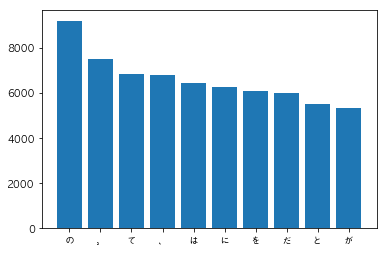

In [93]:
mpl.rcParams['font.family'] = 'AppleGothic'
plt.bar([i[0] for i in dic[:10]], [i[1] for i in dic[:10]])

---
## 38. ヒストグラム
単語の出現頻度のヒストグラム（横軸に出現頻度，縦軸に出現頻度をとる単語の種類数を棒グラフで表したもの）を描け．

(array([1.1218e+04, 1.3000e+01, 5.0000e+00, 4.0000e+00, 1.0000e+00,
        2.0000e+00, 4.0000e+00, 2.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([1.0000e+00, 9.2030e+02, 1.8396e+03, 2.7589e+03, 3.6782e+03,
        4.5975e+03, 5.5168e+03, 6.4361e+03, 7.3554e+03, 8.2747e+03,
        9.1940e+03]),
 <a list of 10 Patch objects>)

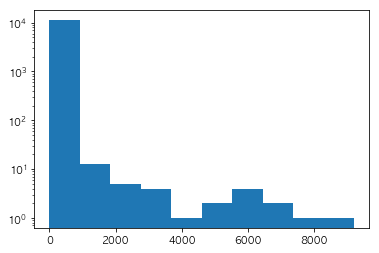

In [96]:
plt.hist([i[1] for i in dic], log = True)

---
## 39. Zipfの法則
単語の出現頻度順位を横軸，その出現頻度を縦軸として，両対数グラフをプロットせよ．

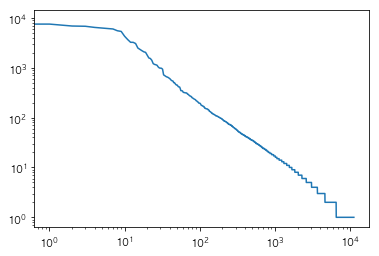

In [104]:
plt.plot(np.arange(len(dic)), [i[1] for i in dic])
ax = plt.gca()
ax.set_xscale("log")
ax.set_yscale("log")

plt.show()